## IMPORT PACKAGE


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

import warnings 

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("ab_test_2.csv")
df.head()

,user_id,group,views,clicks
0,1,control,10.0,0.0
1,2,control,1.0,0.0
2,3,control,1.0,0.0
3,4,control,2.0,0.0
4,5,control,3.0,0.0


In [4]:
df.describe()

,user_id,views,clicks
count,120000.000000,120000.000000,120000.000000
mean,60000.500000,4.991075,0.182692
std,34641.160489,5.915200,0.472547
min,1.000000,1.000000,0.000000
25%,30000.750000,2.000000,0.000000
50%,60000.500000,3.000000,0.000000
75%,90000.250000,6.000000,0.000000
max,120000.000000,205.000000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  120000 non-null  int64  
 1   group    120000 non-null  object 
 2   views    120000 non-null  float64
 3   clicks   120000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
#Gunakan 'style' ggplot
plt.style.use('ggplot')

speciesGroup = df["user_id"].value_counts().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.tight_layout(pad=5.0)

ax[0].pie(speciesGroup['user_id'],labels=speciesGroup['index'],startangle=90,autopct='%.1f%%',shadow=True)
ax[0].title.set_text("Persetanse")


x_index = list(speciesGroup['index'])
y_species = list(speciesGroup['user_id'])
sns.barplot(x=X_index,y=y_species,ax=ax[1])
ax[1].title.set_text("Perbandingan Jumlah presentasi")

fig.subplots_adjust(top=0.8)
plt.suptitle("Jumlah",size=16)

In [6]:
x = df.drop(['user_id', 'group'], axis=1)
y = df['group']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
x.head()

,views,clicks
0,10.0,0.0
1,1.0,0.0
2,1.0,0.0
3,2.0,0.0
4,3.0,0.0


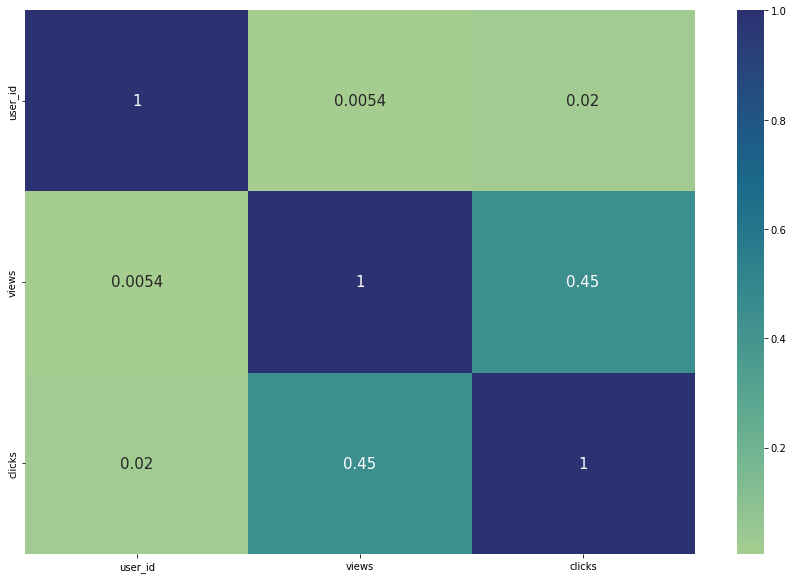

In [9]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),cmap='crest',annot=True,annot_kws={"size":15})
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

## Algoritma Supervised Learning

# 1. K-Nearest Neighbors (KNN)

K-Nearest Neighbour atau algoritma KNN dimana sebuah yang menggunakan algoritma non-parametrik dan yang mengelompokkan poin data berdasarkan kedekatan dan juga asosiasi mereka dengan data lain. dimana algoritma ini mengasumsikan sebuah titik data yang serupa akan selalu bisa ditemukan disekitarnya.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [12]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
knn = KNeighborsClassifier()
knn.fit(x_train_std,y_train)

knn_pred = knn.predict(x_test_std)
acc_knn = accuracy_score(y_test, knn_pred)
print("Akurasi algoritma KNN dengan default paramater :", round(acc_knn,3))


Akurasi algoritma KNN dengan default paramater : 0.496


In [14]:
knn.score(x_test, y_test)

0.5046111111111111

In [15]:
y_pred = knn.predict(x_test)

In [16]:
print(y_pred)

['control' 'control' 'control' ... 'control' 'control' 'control']


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     control       0.51      0.87      0.64     18160
        test       0.50      0.14      0.22     17840

    accuracy                           0.50     36000
   macro avg       0.50      0.50      0.43     36000
weighted avg       0.50      0.50      0.43     36000



In [18]:
y_test.shape

(36000,)

In [19]:
confusion_matrix(y_test, y_pred)

array([[15712,  2448],
       [15386,  2454]], dtype=int64)

### Confusion Matrix 
Confusion matrix adalah sebuah tabel yang sering digunakan untuk mengukur kinerja dari model klasifikasi di machine learning. Tabel ini menggambarkan lebih detail tentang jumlah data yang diklasifikasikan dengan benar maupun salah.

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

Confusion matrix

 [[ 3863 14297]
 [ 3938 13902]]


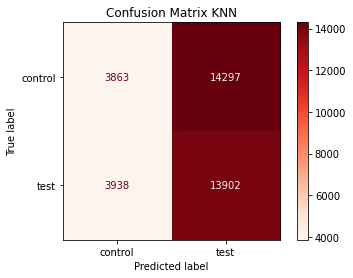

In [21]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

knn_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, knn_pred)
print('Confusion matrix\n\n', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot(cmap='Reds')

plt.title("Confusion Matrix KNN")
plt.grid(False)

# plot_confusion_matrix(knn, x_test, y_test, cmap='Reds')

## 2. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2)

In [23]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [24]:
clf = DecisionTreeClassifier()
dt = clf.fit(x_train, y_train)

dt_pred = dt.predict(x_test)
acc_dt = accuracy_score(y_test, dt_pred)
print("Akurasi algoritma Decision Tree dengan default paramater :", round(acc_dt,3))

Akurasi algoritma Decision Tree dengan default paramater : 0.506


In [25]:
dt_pred = dt.predict(x_test)

In [26]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

     control       0.51      0.60      0.55     18160
        test       0.50      0.41      0.45     17840

    accuracy                           0.51     36000
   macro avg       0.51      0.51      0.50     36000
weighted avg       0.51      0.51      0.50     36000



### Confusion Matrix

Confusion matrix

 [[10911  7249]
 [10517  7323]]


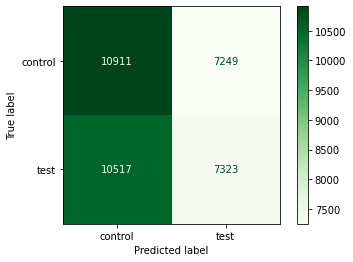

In [27]:
clf = DecisionTreeClassifier()
dt = clf.fit(x_train, y_train)


dt_pred = dt.predict(x_test)

dt_cm = confusion_matrix(y_test, dt_pred)
print('Confusion matrix\n\n', dt_cm)

disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,display_labels=knn.classes_)
disp.plot(cmap='Greens')
plt.grid(False)
plt.show()

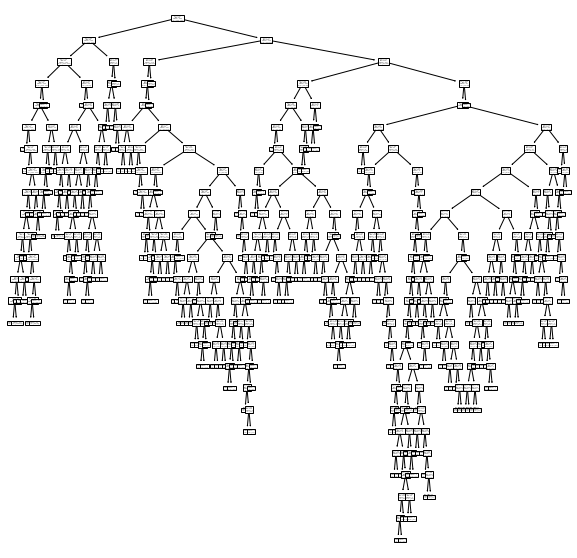

In [28]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dt)
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2,3,4,5,6,7]}
grid = GridSearchCV(dt, params, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7]}, scoring='accuracy')

In [31]:
print(grid.best_params_)

{'max_depth': 2}


## 3. Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()

In [33]:
gnb.fit(x_train, y_train)

GaussianNB()

In [34]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [35]:
gnb_pred = gnb.predict(x_test)
mnb_pred = mnb.predict(x_test)

In [36]:
print("Gaussian NB : ")
print(classification_report(y_test, gnb_pred))

Gaussian NB : 
              precision    recall  f1-score   support

     control       0.51      0.82      0.63     18160
        test       0.52      0.19      0.28     17840

    accuracy                           0.51     36000
   macro avg       0.51      0.51      0.45     36000
weighted avg       0.51      0.51      0.46     36000



In [37]:
print("Multinomial NB : ")
print(classification_report(y_test, mnb_pred))

Multinomial NB : 
              precision    recall  f1-score   support

     control       0.51      0.49      0.50     18160
        test       0.50      0.51      0.51     17840

    accuracy                           0.50     36000
   macro avg       0.50      0.50      0.50     36000
weighted avg       0.50      0.50      0.50     36000



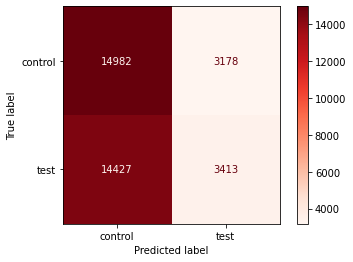

In [38]:
plot_confusion_matrix(gnb, x_test, y_test, cmap='Reds')

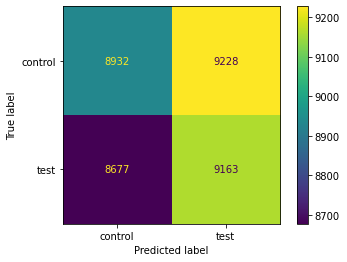

In [39]:
_= plot_confusion_matrix(mnb, x_test, y_test)

## 4. Suport Vector Machine (SVM)

In [40]:
# from sklearn.svm import SVC

# svm = SVC()

In [41]:
# svm.fit(x_train, y_train)

In [42]:
# svm_pred = svm.predict(x_test)

In [43]:
#Akurasi model untuk X_test
# svm_pred = svm.predict(x_test_std)
# acc_svc = accuracy_score(y_test, svc_pred)
# print("Akurasi algoritma SVC dengan default paramater :", round(acc_svc,3))

In [44]:
# print(classification_report(y_test, svm_pred))

In [45]:
# plot_confusion_matrix(svm, x_test, y_test, cmap="Greens")
# plt.show()

## 5. Linear Regression

In [46]:
df = pd.read_csv('dress.csv')
df.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [47]:
df.isna().sum()

_unit_id               0
category               0
category:confidence    0
image_url              0
dtype: int64

In [48]:
df.duplicated().sum()

0

In [49]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()

## A. Simple Linear Regression 
Visualisasikan Hasil Prediksi Linear Regression

In [53]:
lg.fit(df[['category:confidence']], df._unit_id )

LinearRegression()

In [54]:
print(lg.predict([[1.1]]))

[8.51514796e+08]


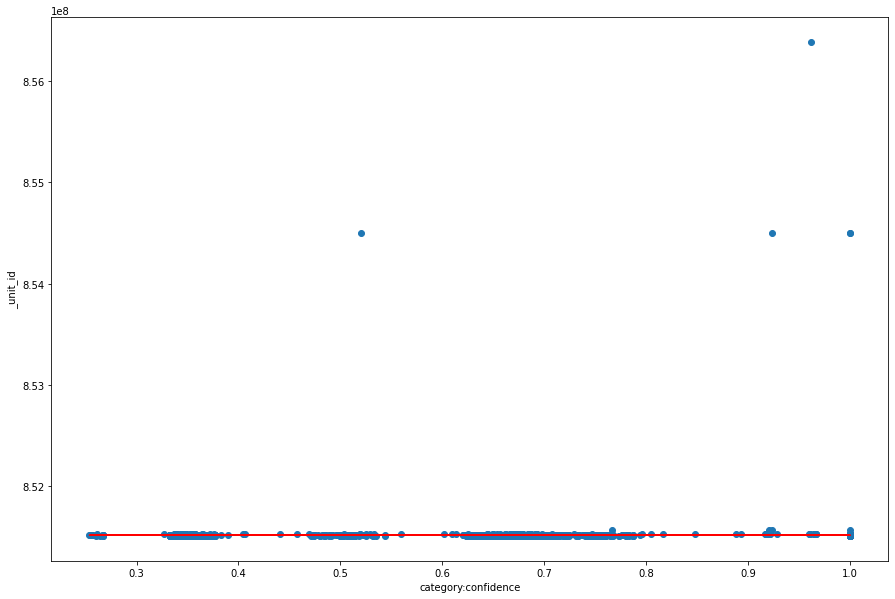

In [55]:
plt.figure(figsize=(15,10))
plt.xlabel('category:confidence')
plt.ylabel('_unit_id')
plt.scatter(df[['category:confidence']], df._unit_id)
plt.plot(df[['category:confidence']], lg.predict(df[['category:confidence']]), color='red')
plt.show()

## B.Multiple Linear Regression

In [56]:
lg.fit(df[['category:confidence',]], df._unit_id)

LinearRegression()

In [57]:
print(lg.predict([[1.1]]))

[8.51514796e+08]


In [58]:
lg.coef_

array([1131.20360642])

In [59]:
lg.intercept_

851513551.7261592

### Bandingkan Algoritma
disini kita membandingkan penggunaan Algoritma yang sudah kita gunakan dengan algoritma satu sama lain nya


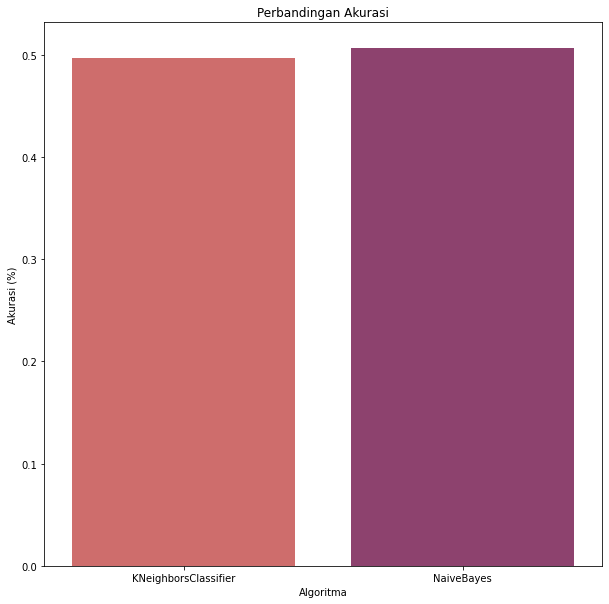

In [60]:
algoritma = ["KNeighborsClassifier","NaiveBayes"]
pred_value = [acc_knn,acc_dt]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = pred_value,palette='flare')

plt.title("Perbandingan Akurasi")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()